In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('january.txt', delimiter= "\t", header = 0)

In [30]:
data.head()

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
0,AA0101,33116,9664491.0,2,PS,990101,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER
1,AA0101,33117,0.0,0,PS,990101,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER
2,AA0101,33118,27997683.0,2,PS,990101,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL
3,AA0101,33119,0.0,0,PS,990101,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH
4,AA0101,33120,0.0,0,PS,990101,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL


(array([1.0307e+04, 6.9640e+03, 4.4350e+03, 2.7070e+03, 1.8670e+03,
        1.1670e+03, 9.3900e+02, 6.2000e+02, 4.9900e+02, 4.2100e+02,
        2.9800e+02, 2.2200e+02, 1.9700e+02, 1.6200e+02, 1.2600e+02,
        1.0100e+02, 9.6000e+01, 7.4000e+01, 6.1000e+01, 4.9000e+01,
        4.1000e+01, 2.8000e+01, 3.0000e+01, 2.1000e+01, 1.4000e+01,
        2.0000e+01, 1.1000e+01, 1.2000e+01, 9.0000e+00, 1.3000e+01,
        1.1000e+01, 6.0000e+00, 7.0000e+00, 6.0000e+00, 2.0000e+00,
        4.0000e+00, 3.0000e+00, 3.0000e+00, 5.0000e+00, 1.0000e+00,
        5.0000e+00, 2.0000e+00, 5.0000e+00, 2.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.00

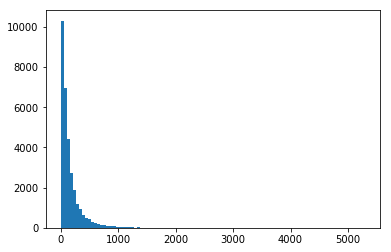

In [4]:
plt.hist(np.asarray(data['ser_time']), bins= 100)

/home/admin-u6015325/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  


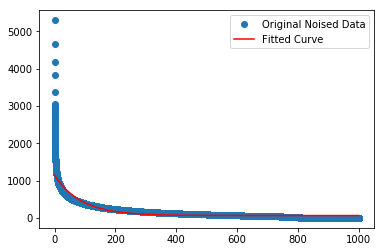

In [27]:
import statsmodels.api as sm
import scipy.stats as stats
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

x = np.linspace(0,1000,31599)
y = np.asarray(sorted(data['ser_time'], reverse= True))
popt, pcov = curve_fit(func, x, y)

plt.figure()
plt.plot(x, y, 'o', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

(array([1.8023e+04, 3.4050e+03, 2.6310e+03, 1.7790e+03, 1.3890e+03,
        9.8200e+02, 7.8800e+02, 5.7800e+02, 4.7600e+02, 3.8400e+02,
        2.4900e+02, 2.1400e+02, 1.7000e+02, 1.3300e+02, 9.7000e+01,
        6.2000e+01, 4.4000e+01, 4.4000e+01, 2.7000e+01, 2.4000e+01,
        1.4000e+01, 1.2000e+01, 1.4000e+01, 1.2000e+01, 6.0000e+00,
        2.0000e+00, 2.0000e+00, 5.0000e+00, 7.0000e+00, 3.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

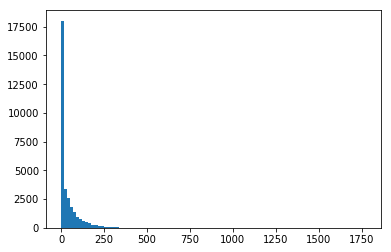

In [20]:
plt.hist(np.asarray(data['q_time']), bins= 100)

/home/admin-u6015325/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  


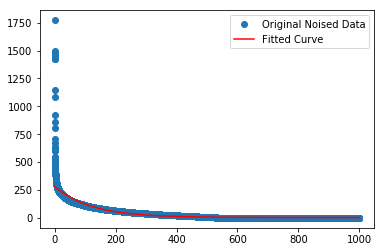

In [28]:
import statsmodels.api as sm
import scipy.stats as stats
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

x = np.linspace(0,1000,31599)
y = np.asarray(sorted(data['q_time'], reverse= True))
popt, pcov = curve_fit(func, x, y)

plt.figure()
plt.plot(x, y, 'o', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

/home/admin-u6015325/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


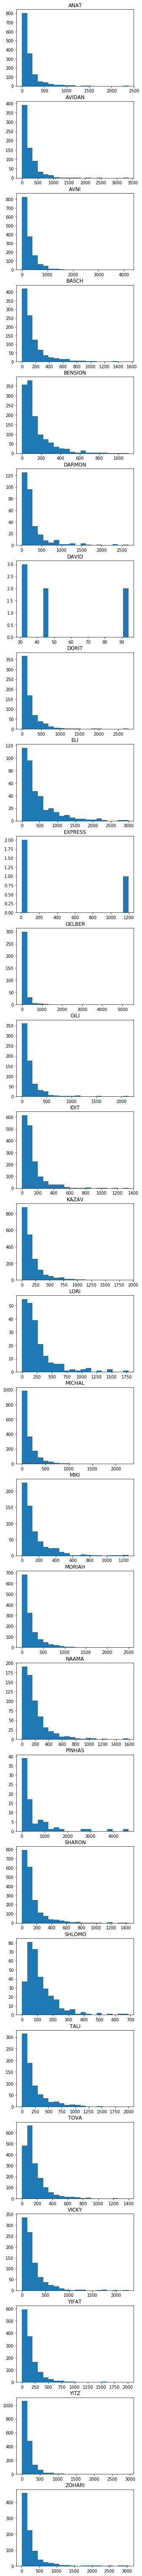

In [51]:
num_server = data['server'].unique().size - 1
i = 0
fig = plt.figure(figsize=(5, num_server * 4))

for key, group_df in data.groupby('server'):
    if key != 'NO_SERVER':
        i += 1
        plt.subplot(num_server, 1, i)
        plt.hist(group_df['ser_time'], bins =20)
        plt.title(key)
        plt.legend()

In [38]:
num_serve

29